# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

In below cell , We use local system path to fetch the data.

In [2]:
df = pd.read_csv('C:/Users/makar/Desktop/Board Infinity/Python_for_DS/Ecommerce_UK_Retailer.csv',encoding= 'unicode_escape')
df.head(11)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


# Data Cleanning

In [3]:
#Remove duplicate rows
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
#Remove negative values in colmn 'Quantity'
df_new = df[(df['Quantity'] >= 0)]

In [5]:
#Check for missing values in all columns and replace them with the appropriate metric
# In our data there is no missing/blank value in main column 'Quantity','UnitPrice','Country','InvoiceDate'
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     531285 non-null  int64  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


# Update the data

In [6]:
#Add the columns - Month, Day and Hour for the invoice
df_new['InvoiceDate'] = df_new['InvoiceDate'].astype('datetime64[ns]')
df_new['Year'] = df_new.InvoiceDate.dt.year
df_new['Month'] = df_new.InvoiceDate.dt.month
df_new['year_month']=df_new.InvoiceDate.map(lambda x: 100*x.year + x.month)
df_new['Day']=(df_new.InvoiceDate.dt.dayofweek)+1 # +1 to make Monday=1.....until Sunday=7
df_new['Hour'] = df_new.InvoiceDate.dt.hour
df_new['Revenue'] = df_new['Quantity'] * df_new['UnitPrice']
df_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34


# Perform Basic EDA

In [7]:
#Unique values across colmn
#.ravel(): as below
#returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
pd.unique(df_new[['Country','Description','StockCode','Country']].values.ravel())


array(['United Kingdom', 'WHITE HANGING HEART T-LIGHT HOLDER', '85123A',
       ..., 'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE', '23843'], dtype=object)

In [8]:
#Aggregation for all numerical Columns
df_new.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,year_month,Day,Hour,Revenue
count,531285.000000,531285.000000,397924.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.000000,531285.00000
mean,10.655262,3.857296,15294.315171,2010.921543,7.560244,201099.714549,3.435561,13.076259,20.03550
std,156.830323,41.810047,1713.169877,0.268890,3.508717,25.800406,1.849816,2.438303,270.91237
min,1.000000,-11062.060000,12346.000000,2010.000000,1.000000,201012.000000,1.000000,6.000000,-11062.06000
25%,1.000000,1.250000,13969.000000,2011.000000,5.000000,201103.000000,2.000000,11.000000,3.75000
50%,3.000000,2.080000,15159.000000,2011.000000,8.000000,201107.000000,3.000000,13.000000,9.90000
75%,10.000000,4.130000,16795.000000,2011.000000,11.000000,201110.000000,5.000000,15.000000,17.70000
max,80995.000000,13541.330000,18287.000000,2011.000000,12.000000,201112.000000,7.000000,20.000000,168469.60000


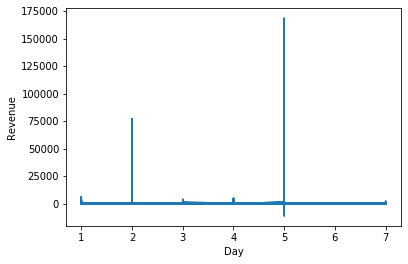

In [9]:
#Line chart to show the trend of data 

plt.plot(df_new['Day'],df_new['Revenue'])
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

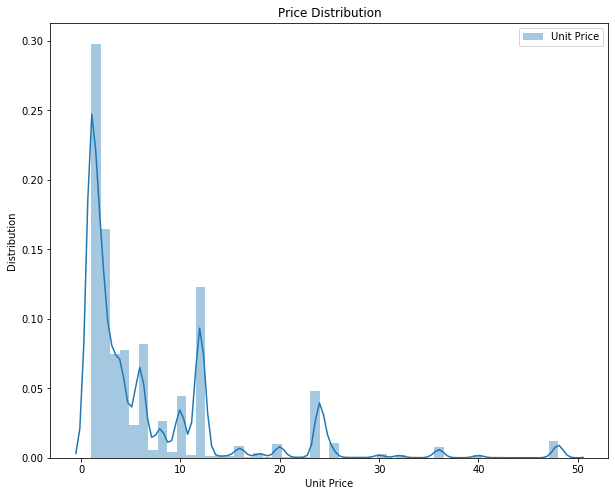

In [10]:
# distribition plot (Skewed +ve)
# If a data set has a positive skew, 
# but the mean of the returns is negative, it means that overall performance is negative
# but here mean is positive hence performance is considerd as to be good
plt.subplots(figsize=(10,8))
sns.distplot(df_new.Quantity[df_new.Quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Distribution')
plt.title('Price Distribution')
plt.show()

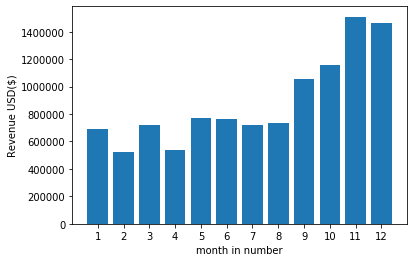

In [11]:
# Bar Plot 
result=df_new.groupby('Month').sum()
month=range(1,13)
plt.bar(month,result['Revenue'])
plt.xticks(month)
plt.xlabel('month in number')
plt.ylabel('Revenue USD($)')
plt.show()

In [12]:
# skewness 
df_new.skew(axis=0,skipna=True)

Quantity      460.130967
UnitPrice      60.552895
CustomerID      0.025776
Year           -3.135448
Month          -0.417780
year_month     -3.047498
Day             0.466762
Hour            0.000429
Revenue       502.218534
dtype: float64

In [13]:
df_new.skew(axis=1,skipna=True)

0         2.957284
1         2.957288
2         2.957290
3         2.957288
4         2.957288
            ...   
541904    2.978223
541905    2.978222
541906    2.978224
541907    2.978224
541908    2.978223
Length: 531285, dtype: float64

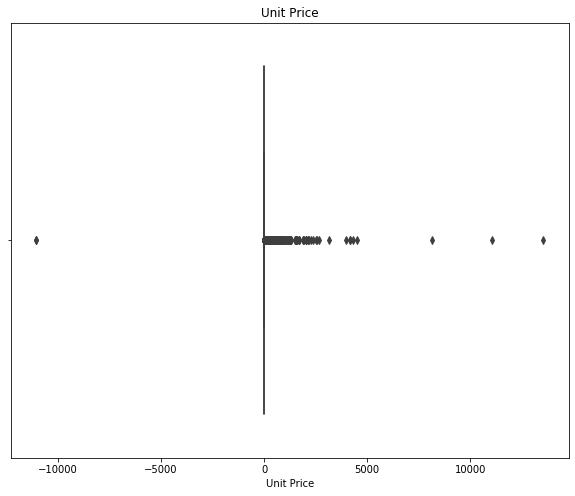

In [14]:
# Box Plot
plt.subplots(figsize=(10,8))
sns.boxplot(df_new.UnitPrice)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.show()

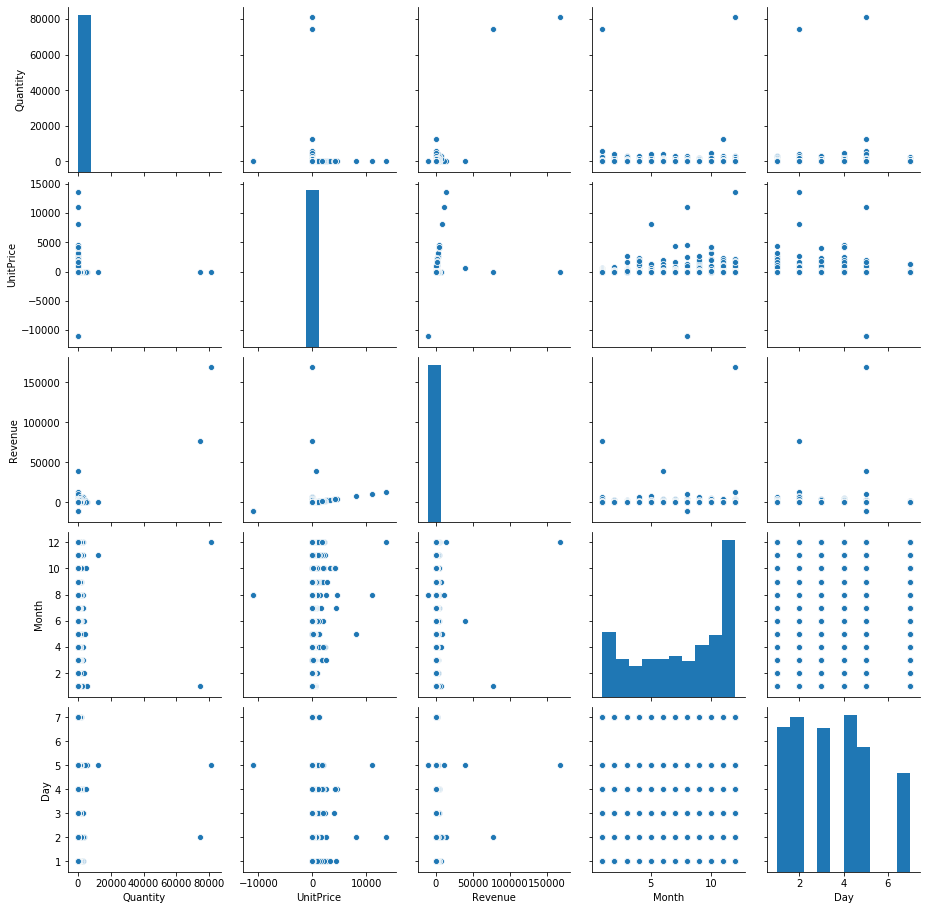

In [15]:
# Pair plot allows us to see both distribution of single variables and relationships between two variables.
sns.pairplot(df_new,vars=["Quantity","UnitPrice","Revenue","Month","Day"])
plt.show()

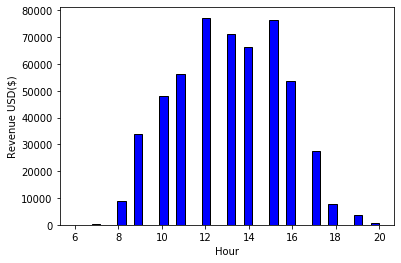

In [16]:
# Histogram (graphical representation of numerical data distribution)
plt.hist(df_new['Hour'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Hour')
plt.ylabel('Revenue USD($)')
plt.show()

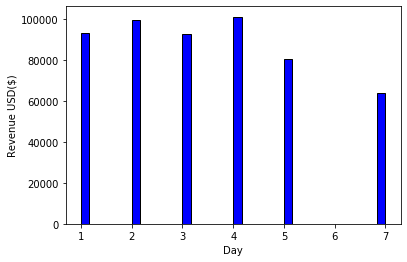

In [17]:
plt.hist(df_new['Day'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Day')
plt.ylabel('Revenue USD($)')
plt.show()

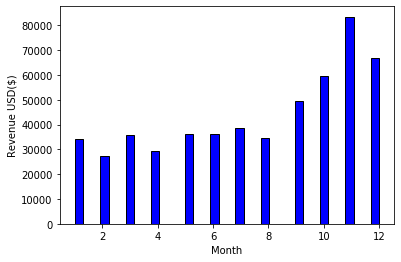

In [18]:
plt.hist(df_new['Month'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Month')
plt.ylabel('Revenue USD($)')
plt.show()

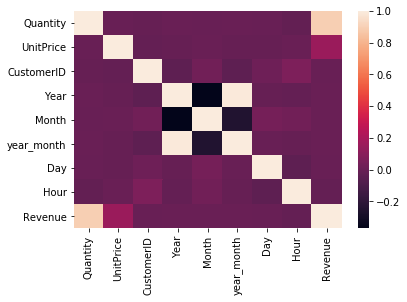

In [19]:
# Heat Map
sns.heatmap(df_new.corr())
plt.show()

# Questions

##### 1. How many orders made by the customers?

In [20]:
index = pd.Index(df_new['Quantity'])
print(f"Total orders made by the customers = {index.value_counts().sum()}")

Total orders made by the customers = 531285


In [21]:
total_order=df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head(10)
print(total_order)

   CustomerID         Country  InvoiceNo
0     12346.0  United Kingdom          1
1     12347.0         Iceland        182
2     12348.0         Finland         31
3     12349.0           Italy         73
4     12350.0          Norway         17
5     12352.0          Norway         85
6     12353.0         Bahrain          4
7     12354.0           Spain         58
8     12355.0         Bahrain         13
9     12356.0        Portugal         59


##### 2. TOP 5 customers with higher number of orders

In [22]:
total_order.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
1,12347.0,Iceland,182
5,12352.0,Norway,85
3,12349.0,Italy,73
9,12356.0,Portugal,59
7,12354.0,Spain,58


##### 3.How much money spent by the customers?

In [23]:
money_spent = df_new.groupby(by=['CustomerID','Country'], as_index=False)['Revenue'].sum()
print(money_spent)

      CustomerID         Country   Revenue
0        12346.0  United Kingdom  77183.60
1        12347.0         Iceland   4310.00
2        12348.0         Finland   1797.24
3        12349.0           Italy   1757.55
4        12350.0          Norway    334.40
...          ...             ...       ...
4342     18280.0  United Kingdom    180.60
4343     18281.0  United Kingdom     80.82
4344     18282.0  United Kingdom    178.05
4345     18283.0  United Kingdom   2094.88
4346     18287.0  United Kingdom   1837.28

[4347 rows x 3 columns]


##### 4. TOP 5 customers with highest money spent

In [24]:
money_spent.sort_values(by='Revenue', ascending=False).head()

,CustomerID,Country,Revenue
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06


##### 5. How many orders per month?

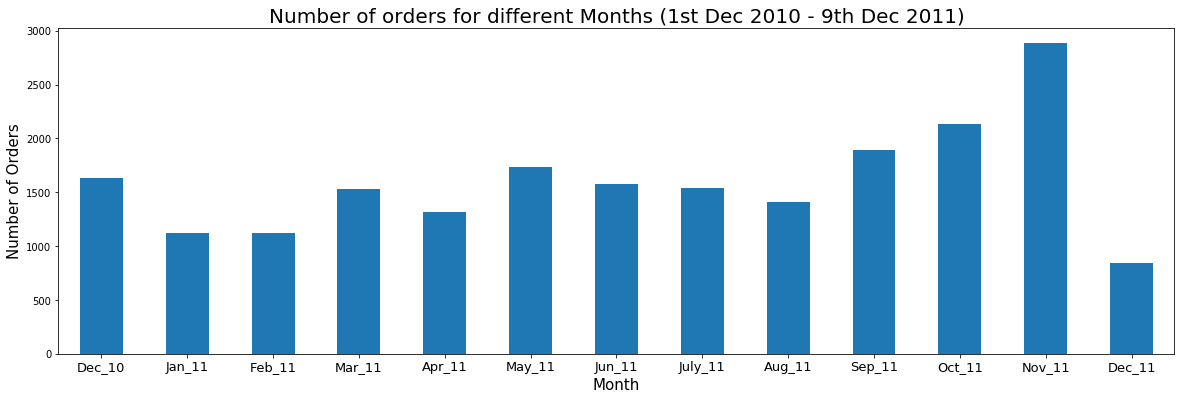

In [25]:
yum = df_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(20,6))
yum.set_xlabel('Month',fontsize=15)
yum.set_ylabel('Number of Orders',fontsize=15)
yum.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=20)
yum.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

##### 6. How many orders per day?

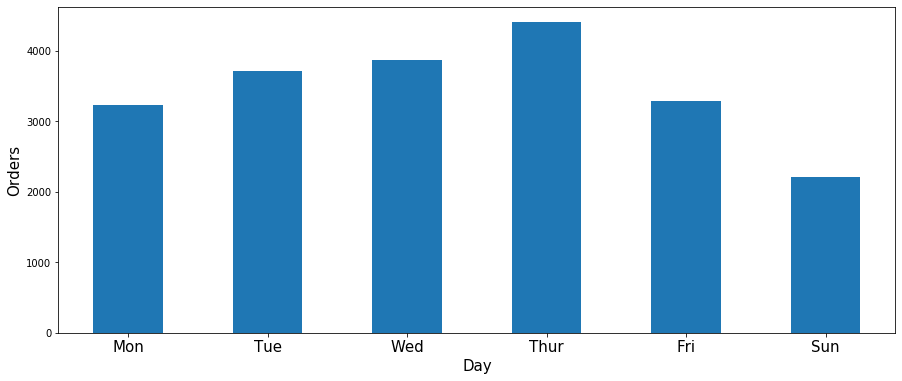

In [26]:
ax = df_new.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Orders',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

##### 7. How many orders per hour?

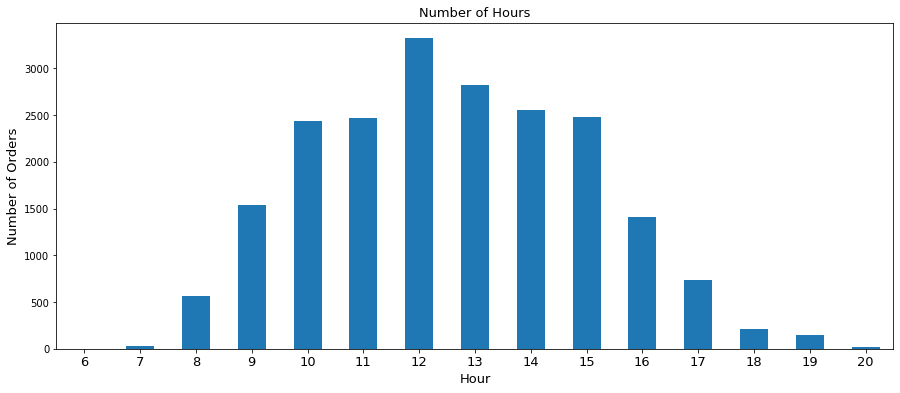

In [27]:
ax = df_new.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=13)
ax.set_ylabel('Number of Orders',fontsize=13)
ax.set_title('Number of Hours',fontsize=13)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=13)
plt.show()

##### 8. How many orders for each country?

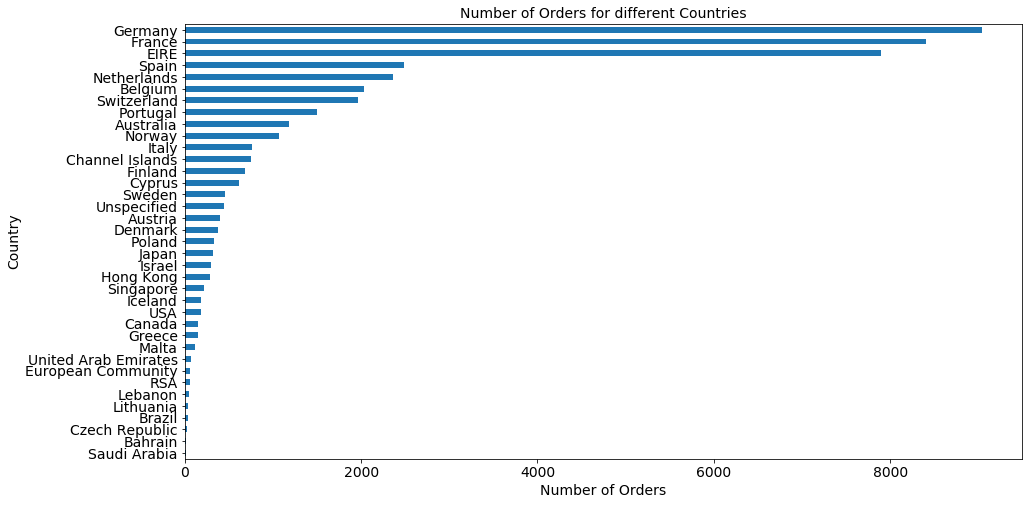

In [28]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14, color=color[0])
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

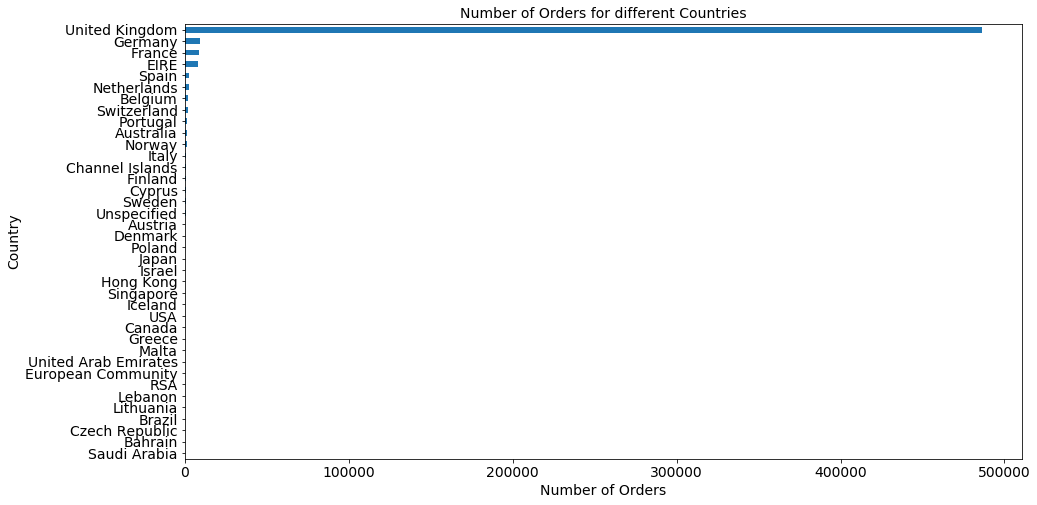

In [29]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
#del group_country_orders['United Kingdom']

# number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14, color=color[0])
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

##### 9.Orders trend across months

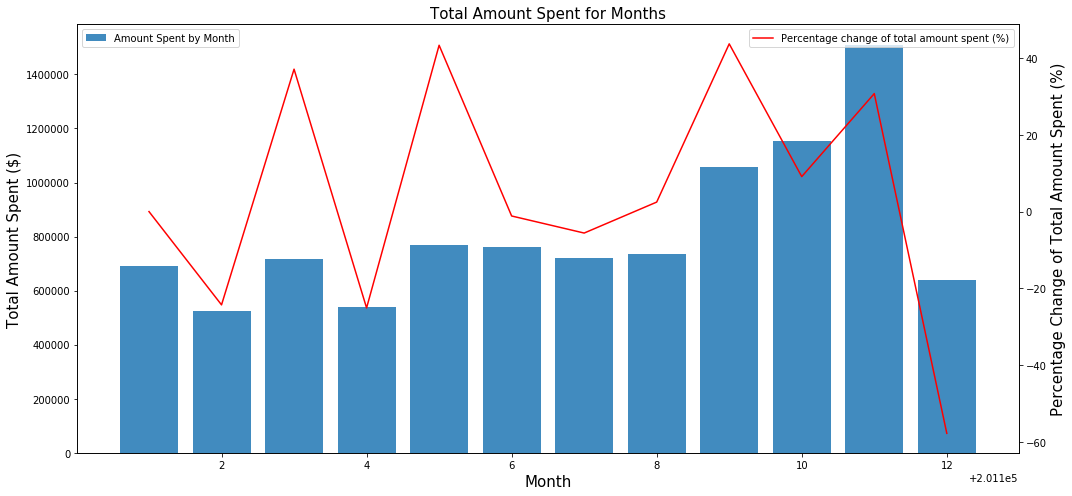

In [30]:
# trend plot
fig = plt.figure(figsize=(15, 7))
x1 = fig.add_subplot(111)

x1.set_xlabel('Month',fontsize=15)
x1.set_ylabel('Total Amount Spent ($)',fontsize=15)
x1.set_title('Total Amount Spent for Months',fontsize=15)

x1.bar(df_new.groupby(by=['year_month'])['Revenue'].sum().index.tolist()[1:],
        df_new.groupby(by=['year_month'])['Revenue'].sum()[1:],
        alpha=0.85,#If you want to make the graph plot more transparent, then you can make alpha less than 1, such as 0.5 or 0.25.
        label='Amount Spent by Month')

x2 = x1.twinx()# tread line

x2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)

#pct_change()Percentage change between the current and a prior element.
x2.plot(df_new.groupby(by=['year_month'])['Revenue'].sum().index.tolist()[1:], 
         df_new.groupby(by=['year_month'])['Revenue'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='red')

x1.legend(loc='upper left')
x2.legend(loc='upper right')

fig.tight_layout()
plt.show()

##### 10. How much money spent by each country?

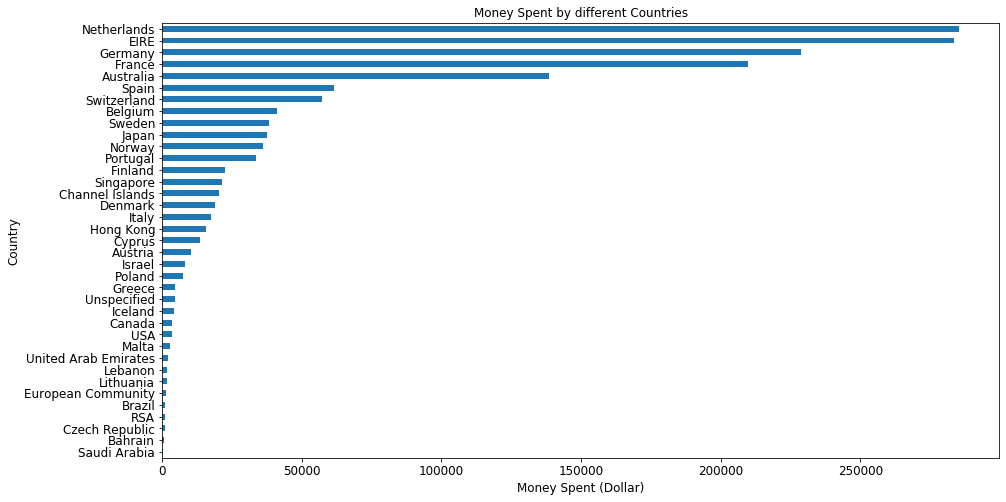

In [31]:
group_country_amount_spent = df_new.groupby('Country')['Revenue'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

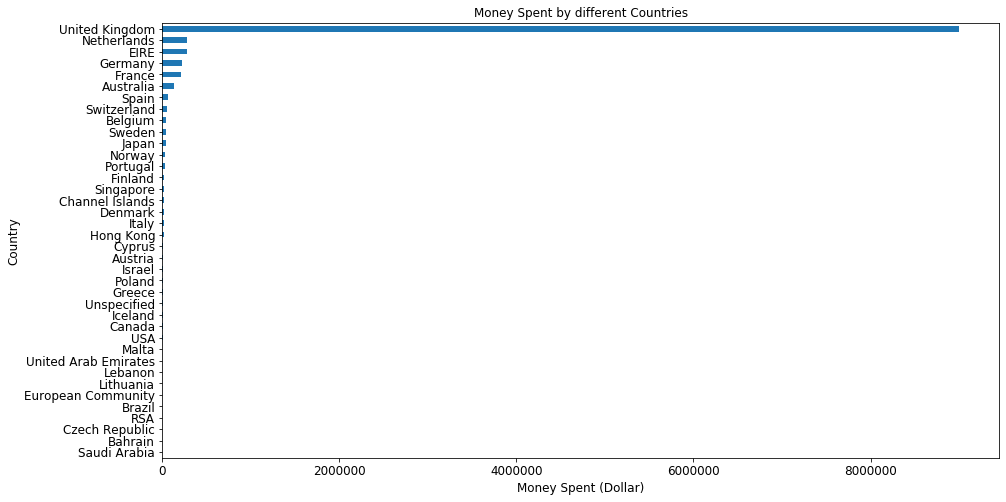

In [32]:
group_country_amount_spent = df_new.groupby('Country')['Revenue'].sum().sort_values()
#del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()